In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 14:52:22 2021

@author: Nathan
"""


import pandas as pd
import numpy as np
import interactive_plot as ip

import matplotlib as mpl 
import matplotlib.pyplot as plt  

import scipy as sp 
from scipy.optimize import curve_fit 



In [4]:
# c = 0.2
# w0 = 0.8927 # hz natural frequency of oscillator
# gamma = 0.378 # undamped 
N = 4000 # number of samples per data frame
TOTAL_TIME = 20 # total sample time, in seconds
PI = np.pi

free_osc = pd.read_csv("free oscillation.lvm", comment = '#', delim_whitespace=True, 
                            names=['time (s)', 'ang vel (rad/s)', 'ang position (theta)'])
free_osc


,time (s),ang vel (rad/s),ang position (theta)
0,0.000,0.162119,0.861458
1,0.005,0.169748,0.805401
2,0.010,0.181192,0.750618
3,0.015,0.190093,0.683094
4,0.020,0.204080,0.632133
...,...,...,...
3995,19.975,0.238412,-1.229224
3996,19.980,0.233326,-1.286555
3997,19.985,0.230783,-1.336243
3998,19.990,0.221882,-1.394848


In [5]:
def harmonic_motion(t, A, w0, d):
    arg = w0*t
    return A*np.sin(arg-d)

In [6]:
def underDampedMotion(t, A, gamma, w1, d):
    exponent = (-1)*gamma*t
    argument = (w1*t) - d
    return A*np.exp(exponent)*np.cos(argument)

In [7]:
def underDampedMotion_plot(t, A, gamma, w1, d):
    exponent = (-1)*gamma*t
    argument = (w1*t) - d
    return A*np.exp(exponent)*np.cos(argument)-0.7

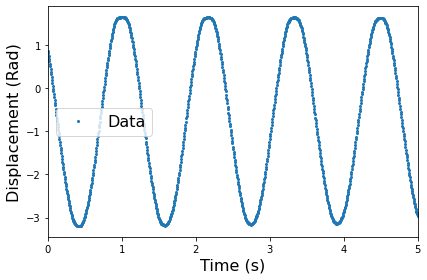

In [8]:
t = free_osc['time (s)']
theta = free_osc['ang position (theta)'] 
v = free_osc['ang vel (rad/s)']
    
%matplotlib inline
plt.plot(t, theta, marker='o', markersize=2, linestyle='None', label='Data')
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Displacement (Rad)', fontsize=16)
plt.tight_layout()
plt.xlim(0, 5)

plt.legend(fontsize=16)


In [9]:
time_between_samples = TOTAL_TIME/N
zero_crossings = np.where(np.diff(np.sign(theta)))[0]
time_zero_crossings = []

for i in zero_crossings:
    time_zero_crossings.append(t[i])
    

# motion crosses the x-axis three times for every wavelength 
period = []
i = 0
while i + 2 < len(time_zero_crossings):
    p = time_zero_crossings[i+2] - time_zero_crossings[i]
    period.append(p)
    i += 3
avg_period = np.mean(period)
print(avg_period)

# convert to angular velocity
w = 2*PI/avg_period
print(w)

1.165
5.393292109167026


In [10]:
# Generate best guess for fit parameters
fitparams = [['A',-3,3,0.0,0.1],['gamma',0.1,2,1,0.01],['w1',0.1,6,0.1,0.25],['d',0.01,5,0.25,0.1]]
function = underDampedMotion  #name of fit function
plotparams = [['x',0,5.0],['y',-3,3],[500]] #set scales for plot. 500 points.
xData = t 
yData = theta 
xErr = None
yErr = None
%matplotlib qt



ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)

In [11]:
# Generate best fit parameters using damped equation of motion
popt, pcov = curve_fit(underDampedMotion, t, theta)
print('A, gamma, w1, d (final answer)', popt) 
A = popt[0]
gamma = popt[1]
w1 = popt[2]
d = popt[3]

xFit = np.linspace(0, 20, 1000)
yFit = underDampedMotion_plot(xFit, *popt)

A, gamma, w1, d (final answer) [-2.59365723  0.01227244  5.39213414  2.22502921]


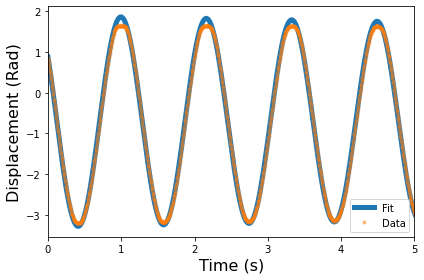

In [12]:
%matplotlib inline
plt.plot(xFit, yFit, label='Fit',linewidth=5)
plt.plot(t, theta, marker='o', markersize=3, linestyle='None', label='Data', alpha=0.45)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Displacement (Rad)', fontsize=16)
plt.xlim(0, 5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('Free Oscillation (PDF).pdf', format='pdf')
plt.savefig('Free Oscillation (SVG).svg', format='svg')
plt.show()

In [13]:
# Generate best fit parameters using free motion equation of
popt, pcov = curve_fit(underDampedMotion, t, theta)
print('A, w1, d (final answer)', popt) 
A = popt[0]
gamma = popt[1]
w1 = popt[2]


xFit = np.linspace(0, 5, 1000)
yFit = underDampedMotion(xFit, *popt)

A, w1, d (final answer) [-2.59365723  0.01227244  5.39213414  2.22502921]


%matplotlib inline
plt.plot(xFit, yFit, label='Fit',linewidth=5)
plt.plot(t, theta, marker='o', markersize=3, linestyle='None', label='Data', alpha=0.45)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Displacement (Rad)', fontsize=16)
plt.xlim(0, 5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('Free Oscillation (PDF).pdf', format='pdf')
plt.savefig('Free Oscillation (SVG).svg', format='svg')
plt.show()

In [17]:
print(pcov)
dw1 = pcov[1][1]
dw1 = np.sqrt(dw1)
print(dw1)

[[ 1.18488211e-03 -3.58847106e-05  6.64681251e-08 -6.77767042e-07]
 [-3.58847106e-05  1.50235302e-06 -9.21174645e-09 -2.34228139e-08]
 [ 6.64681251e-08 -9.21174645e-09  1.43405023e-06  1.31297434e-05]
 [-6.77767042e-07 -2.34228139e-08  1.31297434e-05  1.68151787e-04]]
0.0012257051111345255
